In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [6]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

## Satışların toplam tutarının genel dağılımı nasıldır?

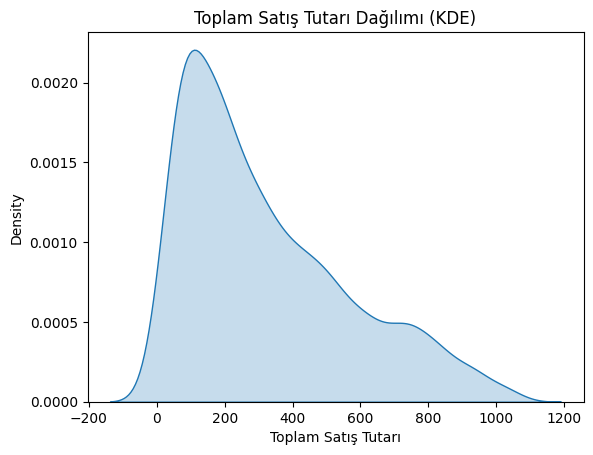

In [7]:
sns.kdeplot(data=df , x='Total' , fill=True , bw_adjust=0.8)
plt.title("Toplam Satış Tutarı Dağılımı (KDE)")
plt.xlabel("Toplam Satış Tutarı")
plt.show()


## Şubelere (Branch) göre toplam satış tutarının dağılımı nasıl değişiyor?

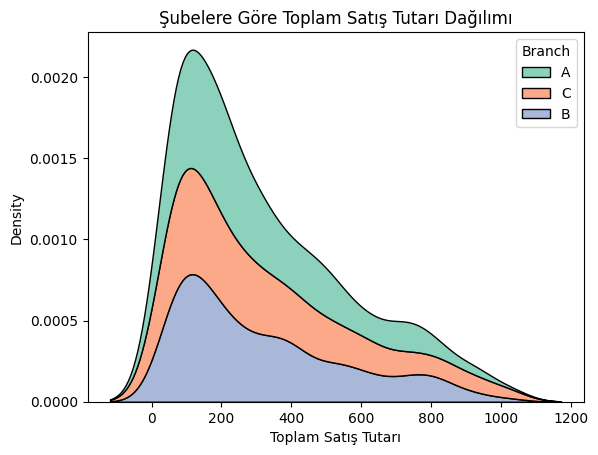

In [12]:
sns.kdeplot(data=df , x='Total' , hue='Branch',
                fill=True , multiple='stack' , bw_adjust=0.7 , palette='Set2')
plt.title("Şubelere Göre Toplam Satış Tutarı Dağılımı")
plt.xlabel("Toplam Satış Tutarı")
plt.show()

## Kadın ve erkek müşterilerin toplam harcama dağılımı farklı mı?

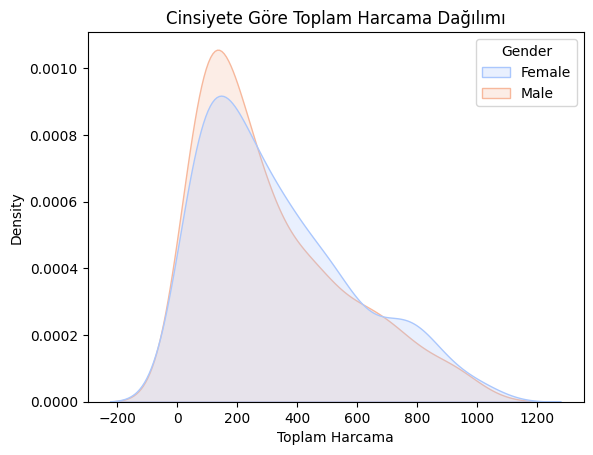

In [15]:
sns.kdeplot(data=df , x='Total' , hue='Gender' 
            ,fill=True , multiple='layer' , bw_adjust=1.1 , palette='coolwarm')
plt.title("Cinsiyete Göre Toplam Harcama Dağılımı")
plt.xlabel("Toplam Harcama")
plt.show()

## Ödeme yöntemine göre brüt gelir (gross income) dağılımı nasıl?

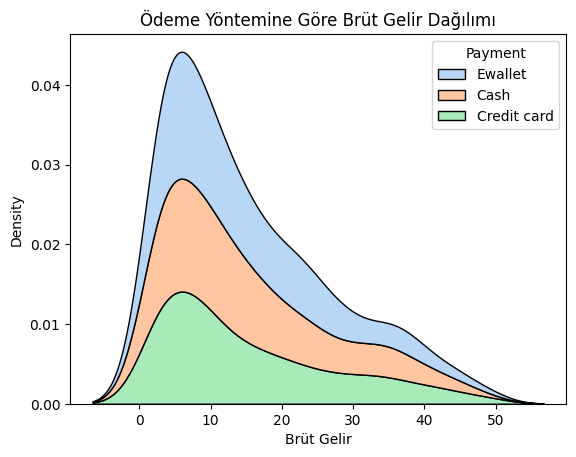

In [27]:
sns.kdeplot(data=df ,x='gross income' , hue='Payment',
                fill=True , multiple='stack' , bw_adjust=0.8 , palette="pastel")
plt.title("Ödeme Yöntemine Göre Brüt Gelir Dağılımı")
plt.xlabel("Brüt Gelir")
plt.show()

## Ürün grubu ve müşteri tipine göre birim fiyat dağılımı nasıl değişiyor?

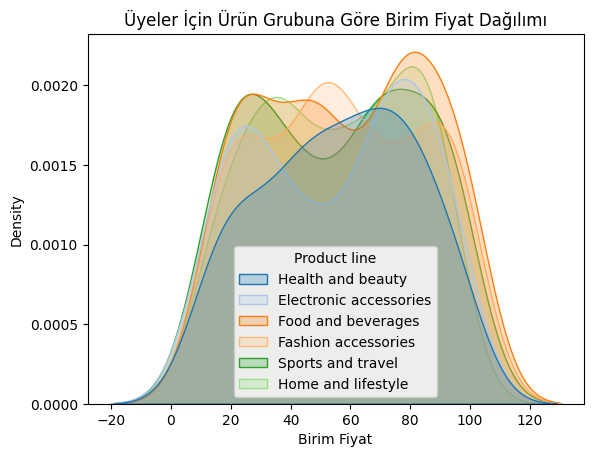

In [32]:
sns.kdeplot(
    data=df[df['Customer type'] == "Member"], x="Unit price", hue="Product line",
    fill=True, multiple='layer', bw_adjust=0.9 , palette="tab20"
)
plt.title("Üyeler İçin Ürün Grubuna Göre Birim Fiyat Dağılımı")
plt.xlabel("Birim Fiyat")
plt.show()

## Şubelere göre müşteri puanı (Rating) dağılımı nasıl?

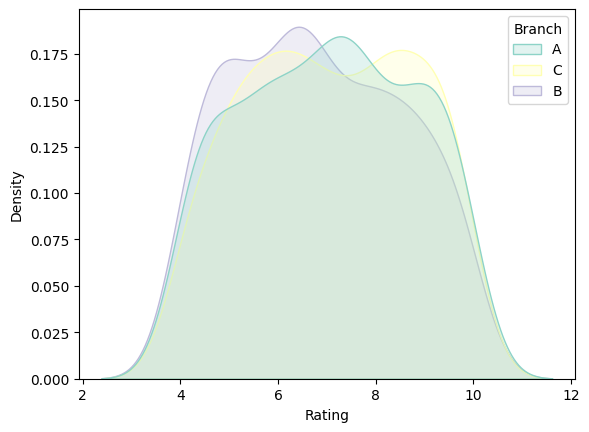

In [35]:
sns.kdeplot(data=df , x='Rating' , hue='Branch' , 
                    fill=True , bw_adjust=1 , palette='Set3' , common_norm=False)
plt.show()

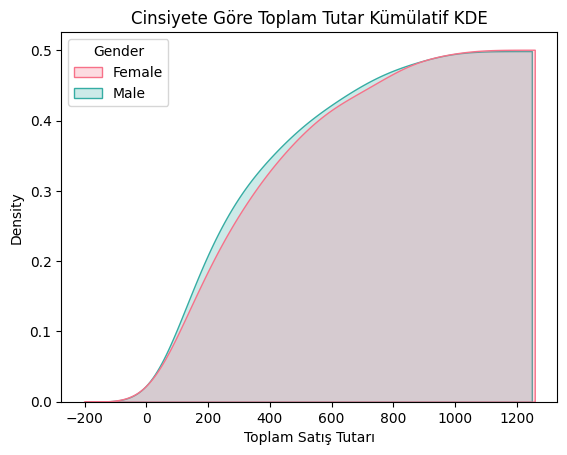

In [42]:
sns.kdeplot(data=df , x='Total' , hue='Gender',
                         cumulative=True ,fill=True , bw_adjust=1 , palette="husl")
plt.title("Cinsiyete Göre Toplam Tutar Kümülatif KDE")
plt.xlabel("Toplam Satış Tutarı")
plt.show()

C:\Users\erena\AppData\Local\Temp\ipykernel_2796\2275972059.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df , x='gross income'


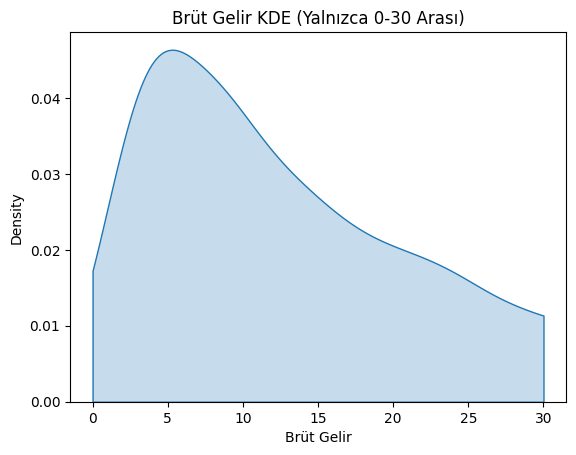

In [47]:
sns.kdeplot(data=df , x='gross income' 
                , fill=True , clip=(0,30) , bw_adjust=0.8 , palette="pastel")
plt.title("Brüt Gelir KDE (Yalnızca 0-30 Arası)")
plt.xlabel("Brüt Gelir")
plt.show()

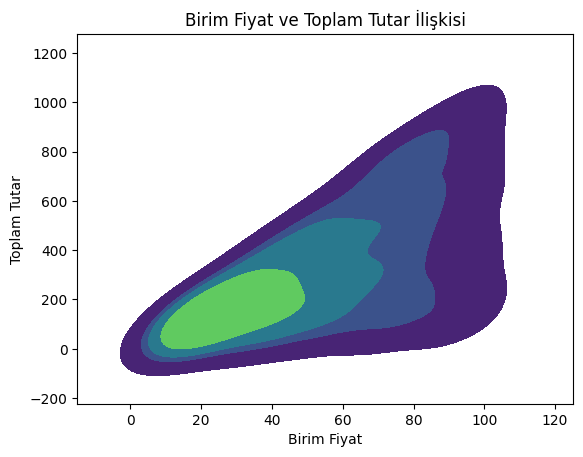

In [52]:
sns.kdeplot(data=df  ,x='Unit price' ,y='Total',
                    fill=True,cmap='viridis' , levels=5 , thresh=0.05)
plt.title("Birim Fiyat ve Toplam Tutar İlişkisi")
plt.xlabel("Birim Fiyat")
plt.ylabel("Toplam Tutar")
plt.show()